###Tempo de execução
#####Para calcular o tempo de execução de cada uma das funções utilizaremos o módulo timeit do Python. O módulo timeit foi criado para que desenvolvedores Python possam fazer medições de tempo multi-plataforma executando as funções em um ambiente consistente e usando mecanismos de medição de tempo similares, dentro do possível, entre sistemas operacionais.

#####Para usar o timeit você cria um objeto Timer cujos parâmetros são duas declarações em Python. O primeiro parâmetro é a declaração em Python cujo tempo você quer medir; o segundo parâmetro é uma declaração que será executada uma vez para configurar o teste. O módulo timeit medirá então quanto tempo leva a execução da declaração algumas vezes. Por padrão timeit tentará executar a declaração um milhão de vezes. Ao terminar ele devolve o tempo como um valor em ponto flutuante representando o número total de segundos.


##### Vamos analisar qual das quatro formas de criar listas é mais eficiente em termos tempo de execução.

In [ ]:
import timeit

# Definindo as funções a serem testadas (Escreva aqui em baixo os códigos do slide)
def teste1():
    l = []
    for i in range(100):
        l = l + [i]

def teste2():
    l = []
    for i in range(100):
        l.append(i)

def teste3():
    l = [i for i in range(100)]

def teste4():
    l = list(range(100))


# Usando timeit para testar o tempo de execução de cada função
tempo_teste1 = timeit.timeit("teste1()", globals=globals(), number=100000)
tempo_teste2 = timeit.timeit("teste2()", globals=globals(), number=100000)
tempo_teste3 = timeit.timeit("teste3()", globals=globals(), number=100000)
tempo_teste4 = timeit.timeit("teste4()", globals=globals(), number=100000)

tempo_teste1, tempo_teste2, tempo_teste3, tempo_teste4

(6.906342529999961,
 0.2888309789999539,
 0.20289025800002491,
 0.08788918400000512)



####**Função teste1**: Cada vez que você faz l = l + [i], você está criando uma nova lista e copiando todos os elementos da lista antiga, além de adicionar o novo elemento. Isso significa que o custo de concatenação cresce com o tamanho da lista, resultando em uma complexidade quadrática. Complexidade: O(n²)

####**Função teste2**: Uma lista vazia l é criada e o método append adiciona um elemento ao final da lista. Em seguida, um loop for é usado para adicionar elementos à lista utilizando o método append. Cria a lista uma unica vez. Complexidade: O(n).

####**Função teste3**: Aqui, uma compreensão de lista (list comprehension) é é uma maneira mais pythonica e eficiente de criar listas em uma única linha de código (Internamente, é equivalente a um loop for, mas com menos sobrecarga). Complexidade: O(n).

####**Função teste4**:  O range gera uma sequência de números sem realmente armazená-los em memória como uma lista. Quando passamos essa sequência para a função list(), o Python aloca a memória necessária uma vez e preenche a lista diretamente. Essa operação é altamente otimizada e não envolve loops explícitos no código Python. Complexidade: O(n)



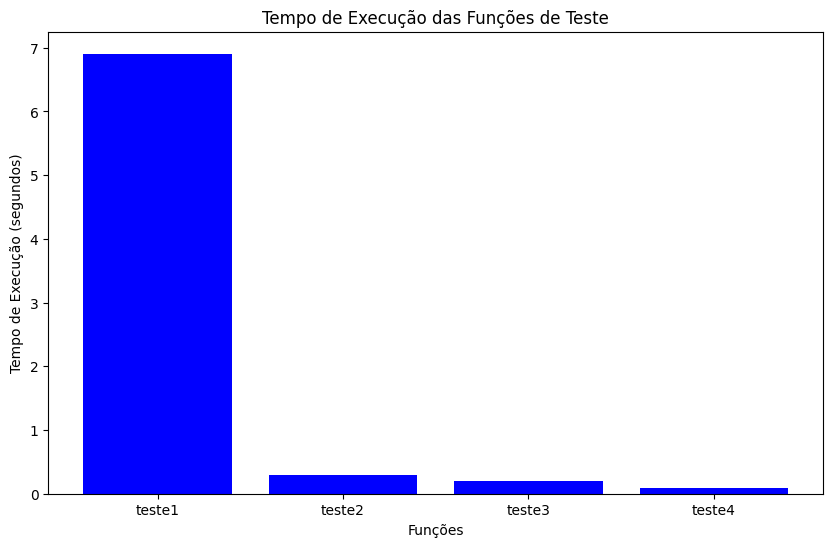

In [ ]:
import matplotlib.pyplot as plt

# Dados dos tempos de execução
funcoes = ['teste1', 'teste2', 'teste3', 'teste4']
tempos = [tempo_teste1, tempo_teste2, tempo_teste3, tempo_teste4]

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(funcoes, tempos, color='blue')
plt.xlabel('Funções')
plt.ylabel('Tempo de Execução (segundos)')
plt.title('Tempo de Execução das Funções de Teste')
plt.show()

###Implementação de lista simplesmente encadeada (ou Lista Ligada)
#####  Em Java

```java
public class SinglyLinkedList<E> {

    // Classe interna Node (nó)
    private static class Node<E> {
        private E element;      // Elemento armazenado no nó
        private Node<E> next;   // Referência para o próximo nó

        public Node(E e, Node<E> n) {
            element = e;
            next = n;
        }

        public E getElement() {
            return element;
        }

        public Node<E> getNext() {
            return next;
        }

        public void setNext(Node<E> n) {
            next = n;
        }
    }

    // Atributos da lista
    private Node<E> head = null; // Primeiro nó da lista
    private Node<E> tail = null; // Último nó da lista
    private int size = 0;        // Tamanho da lista

    // Construtor
    public SinglyLinkedList() { }

    // Métodos de acesso
    public int size() {
        return size;
    }

    public boolean isEmpty() {
        return size == 0;
    }

    public E first() {
        if (isEmpty()) return null;
        return head.getElement();
    }

    public E last() {
        if (isEmpty()) return null;
        return tail.getElement();
    }

    // Métodos de atualização
    public void addFirst(E e) {
        head = new Node<>(e, head); // Cria um novo nó e o define como head
        if (size == 0)
            tail = head; // Caso especial: lista estava vazia
        size++;
    }

    public void addLast(E e) {
        Node<E> newest = new Node<>(e, null); // Cria um novo nó
        if (isEmpty())
            head = newest; // Caso especial: lista estava vazia
        else
            tail.setNext(newest); // Liga o novo nó ao final da lista
        tail = newest; // Atualiza o tail para o novo nó
        size++;
    }

    public E removeFirst() {
        if (isEmpty()) return null; // Lista vazia, nada para remover
        E answer = head.getElement();
        head = head.getNext(); // Atualiza o head para o próximo nó
        size--;
        if (size == 0)
            tail = null; // Caso especial: lista ficou vazia
        return answer;
    }
}
```


###Vamos implementar o Main.java

 -  A lista é criada usando a classe SinglyLinkedList, que implementa uma lista simplesmente encadeada.

- A lista é do tipo Integer, ou seja, armazena valores inteiros.

-       Os elementos 10, 20 e 30 são adicionados no início da lista usando o método addFirst.

  -        Após as adições, a lista fica na ordem: [30, 20, 10].

-  Os elementos 40 e 50 são adicionados no final da lista usando o método addLast.

  -   Após as adições, a lista fica na ordem: [30, 20, 10, 40, 50].

- Usamos o método first() retorna o primeiro elemento da lista. Qual número aparecerá?

- Usamos método last() retorna o último elemento da lista. Qual número aparecerá?

- Usamos método removeFirst() remove e retorna o primeiro elemento da lista (30).

  - Após a remoção, a lista fica na ordem: [20, 10, 40, 50].

-   Usamos método size() retorna o número de elementos na lista.

  - Após a remoção do primeiro elemento, o tamanho da lista é 4.

-   O método isEmpty() retorna true se a lista estiver vazia e false caso contrário.

  - Neste caso, a lista não está vazia, então o método retorna false.

-     Um loop while é usado para remover todos os elementos da lista, um por um, usando o método removeFirst().

  -  A cada remoção, o elemento removido é exibido.
-     Após a remoção de todos os elementos, o método isEmpty() é chamado novamente.

  -   Agora, a lista está vazia, então o método retorna true.


```java
public class Main {
    public static void main(String[] args) {
        // Criando uma lista de inteiros
        SinglyLinkedList<Integer> list = new SinglyLinkedList<>();

        // Adicionando elementos no início
        list.addFirst(10);
        list.addFirst(20);
        list.addFirst(30);

        // Adicionando elementos no final
        list.addLast(40);
        list.addLast(50);

        // Exibindo o primeiro e o último elemento
        System.out.println("Primeiro elemento: " + list.first()); // 30
        System.out.println("Último elemento: " + list.last());    // 50

        // Removendo o primeiro elemento
        System.out.println("Elemento removido: " + list.removeFirst()); // 30

        // Exibindo o tamanho da lista
        System.out.println("Tamanho da lista: " + list.size()); // 4

        // Verificando se a lista está vazia
        System.out.println("A lista está vazia? " + list.isEmpty()); // false

        // Removendo todos os elementos
        while (!list.isEmpty()) {
            System.out.println("Removendo: " + list.removeFirst());
        }

        // Verificando se a lista está vazia após a remoção
        System.out.println("A lista está vazia? " + list.isEmpty()); // true
    }
}```

###Implementação de lista duplamente encadeada em Python
#####  classe DoublyLinkedBase para realizar operações básicas em uma lista duplamente ligada.

Primeiro, vamos revisar a implementação da classe DoublyLinkedBase:


In [ ]:
class DoublyLinkedBase:
    """Uma classe base que fornece uma representação de lista duplamente ligada."""

    class Node:
        """Classe leve e não pública para armazenar um nó duplamente ligado."""
        __slots__ = '_element', '_prev', '_next'

        def __init__(self, element, prev, next):
            self._element = element
            self._prev = prev
            self._next = next

    def __init__(self):
        """Cria uma lista vazia."""
        self._header = self.Node(None, None, None)
        self._trailer = self.Node(None, None, None)
        self._header._next = self._trailer  # trailer é depois do header
        self._trailer._prev = self._header  # header é antes do trailer
        self._size = 0  # número de elementos

    def __len__(self):
        """Retorna o número de elementos na lista."""
        return self._size

    def is_empty(self):
        """Retorna True se a lista estiver vazia."""
        return self._size == 0

    def _insert_between(self, e, predecessor, successor):
        """Adiciona o elemento e entre dois nós existentes e retorna o novo nó."""
        newest = self.Node(e, predecessor, successor)  # ligado aos vizinhos
        predecessor._next = newest
        successor._prev = newest
        self._size += 1
        return newest

    def _delete_node(self, node):
        """Exclui um nó não-sentinela da lista e retorna seu elemento."""
        predecessor = node._prev
        successor = node._next
        predecessor._next = successor
        successor._prev = predecessor
        self._size -= 1
        element = node._element  # registra o elemento excluído
        node._prev = node._next = node._element = None  # desativa o nó
        return element  # retorna o elemento excluído


##Exemplo 1: Inserir elementos na lista
Vamos criar uma instância de DoublyLinkedBase e adicionar alguns elementos entre o cabeçalho e o trailer.

In [ ]:
# Cria uma instância de DoublyLinkedBase
dll = DoublyLinkedBase()

# Insere elementos na lista
node1 = dll._insert_between(10, dll._header, dll._trailer)
node2 = dll._insert_between(20, node1, dll._trailer)
node3 = dll._insert_between(30, node2, dll._trailer)
node4 = dll._insert_between(40, node3, dll._trailer)


# Exibe o número de elementos na lista
print('O número de elementos:',len(dll))

# Percorre e imprime os elementos da lista
current = dll._header._next
while current != dll._trailer:
    print(current._element)
    current = current._next


O número de elementos: 4
10
20
30
40


##Exemplo 2: Excluir elementos da lista
Vamos excluir um elemento da lista e imprimir os elementos restantes.

In [ ]:
# Exclui o segundo nó (contendo 20)
dll._delete_node(node2)

# Exibe o número de elementos na lista
print("Tamanho da lista após exclusão:", len(dll))

# Percorre e imprime os elementos restantes na lista
current = dll._header._next
while current != dll._trailer:
    print(current._element)
    current = current._next


Tamanho da lista após exclusão: 3
10
30
40


##Exemplo 3: Verificar se a lista está vazia

In [ ]:
# Verifica se a lista está vazia
print("A lista está vazia?", dll.is_empty())

# Exclui todos os nós restantes
dll._delete_node(node1)
dll._delete_node(node3)
dll._delete_node(node4)
# Verifica novamente se a lista está vazia
print("A lista está vazia após excluir todos os nós?", dll.is_empty())


A lista está vazia? False
A lista está vazia após excluir todos os nós? True


##Exemplo 4: Inserir elementos no início e no fim da lista

In [ ]:
# Insere um novo nó no início (após o cabeçalho)
first_node = dll._insert_between(40, dll._header, dll._header._next)

# Insere um novo nó no fim (antes do trailer)
last_node = dll._insert_between(50, dll._trailer._prev, dll._trailer)

# Exibe o número de elementos na lista
print("Tamanho da lista:", len(dll))

# Percorre e imprime os elementos na lista
current = dll._header._next
while current != dll._trailer:
    print(current._element)
    current = current._next


Tamanho da lista: 2
40
50


Esses exemplos mostram como você pode usar a classe DoublyLinkedBase para inserir e excluir elementos em uma lista duplamente ligada. Note que a classe DoublyLinkedBase é uma base para outras implementações mais específicas que podem fornecer uma interface pública mais completa e amigável para o usuário.